In [1]:
import warnings
import itertools
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
# fix random seed for reproducibility
np.random.seed(7)

In [3]:
# date parser
parser = lambda date: pd.to_datetime(date, format='%d-%m-%y %H:%M')

# load the dataset
df = pd.read_csv(
    'EVANS-EFCO_final_clean_with_2018.csv', parse_dates=[0],
    index_col=[0], date_parser=parser, engine='python'
)

In [4]:
series = df.loc[:, 'ENERGY CONSUMPTION'].values
series

array([ 7. ,  7. ,  7. , ..., 10. ,  9.5,  9. ])

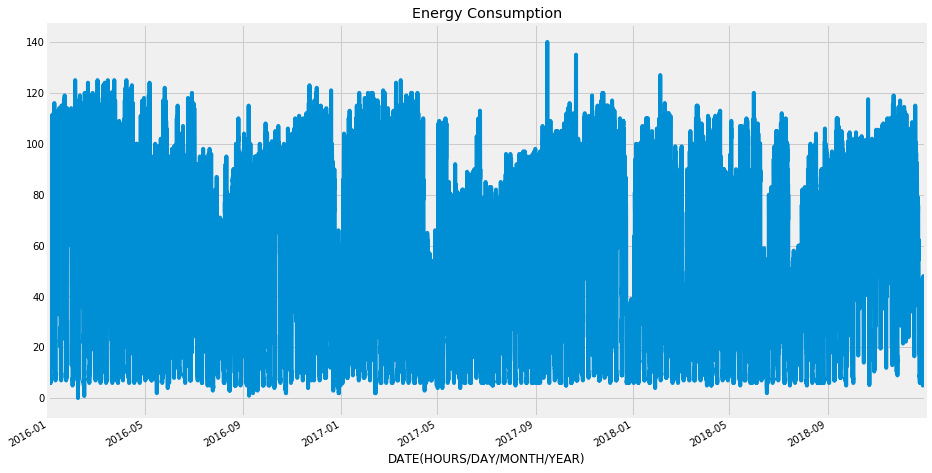

In [5]:
df.plot(figsize=(14,8), legend=None, title='Energy Consumption')

## Check stationarity of the data

In [6]:
# ADF Test to check if our data is stationary or not
result = adfuller(series, autolag='AIC')

In [7]:
print(f'ADF Statistic: {result[0]}\n')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}\n')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -21.491006855077533

n_lags: 0.0
p-value: 0.0

Critial Values:
   1%, -3.430599102593299
Critial Values:
   5%, -2.8616500960359854
Critial Values:
   10%, -2.5668286008605627


Since P < 0.05 and ADF stat is way lesser than any critical value, our time series is stationary.

In [8]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
# 2880 = (24 hours x 30 days x 4 months)
seasonal_pdq = [(x[0], x[1], x[2], 2880) for x in list(itertools.product(p, d, q))]

In [9]:
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 2880)
SARIMAX: (0, 0, 1) x (0, 1, 0, 2880)
SARIMAX: (0, 1, 0) x (0, 1, 1, 2880)
SARIMAX: (0, 1, 0) x (1, 0, 0, 2880)


In [ ]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(
                series,
                order=param,
                seasonal_order=param_seasonal,
                enforce_stationarity=False,
                enforce_invertibility=False
            )
            results = mod.fit()
            print('ARIMA{}x{}2880 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 2880)12 - AIC:297357.81881091936
